# State of the art: Quantum Interference. 

Since this is an "art", so we would just demonstrate its beautifulness instead of its usefulness. 

In [137]:
import qiskit.tools.jupyter 
%qiskit_version_table

In [139]:
%config Completer.use_jedi = False
from qiskit import *
from qiskit.visualization import plot_histogram
from helper.helper import run_for_result

### Explanation

We will try to approach this artistically. What we will implement is between sandwich of Hadamard gate, in between we add S and T gate (and Sdg and Tdg gate every odd repetition) (count starting from 0), to see that we could not get perfect retrieval of state after "Hadamard-ing" in the middle. We will be using a "perfect simulator" (one that have no noise) but it will demonstrate "artificial noise" presence due to imperfect retrieval of state to 0 after "Hadamard-ing". 

Let's begin. 

Starting from the most basic implementation with one repeat only, so there are only S and T gate without Sdg and Tdg gate. 

In [142]:
def create_circuit(num_repeat):
    """
    This will be the circuit we use for demonstration. 
    """
    qc = QuantumCircuit(n, n)

    for _ in range(num_repeat):
        qc.h(range(n))

        if _ % 2 == 0:
            qc.s(range(n))
            qc.t(range(n))
        else:
            qc.sdg(range(n))
            qc.tdg(range(n))

    qc.h(range(n))
    qc.measure(range(n), range(n))
    
    return qc

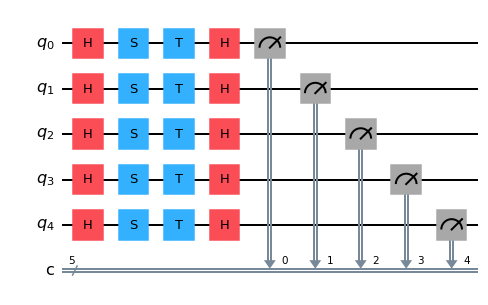

In [143]:
n = 5

qc = create_circuit(1)

qc.draw("mpl", style="iqx")

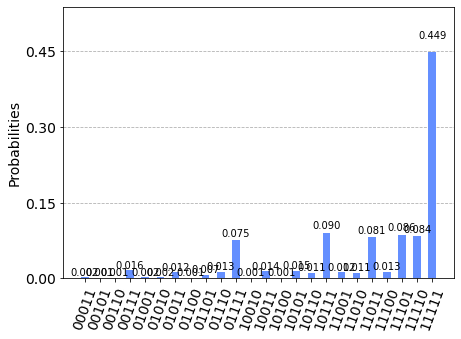

In [144]:
counts = run_for_result(qc)
plot_histogram(counts)

We can clearly see that there is still the most constructive interference at "11111" and other smaller constructive interference here and there, while others interfere destructively. Note our `num_repeat` = 1 (odd number). 

Now, what would happen if we change the `num_repeat` in our `create_circuit` function to 2 (even number)? 

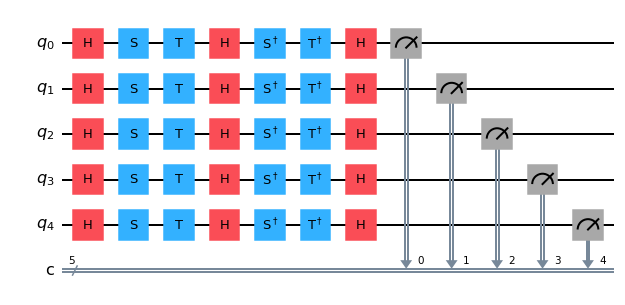

In [145]:
qc = create_circuit(2)
qc.draw("mpl", style="iqx")

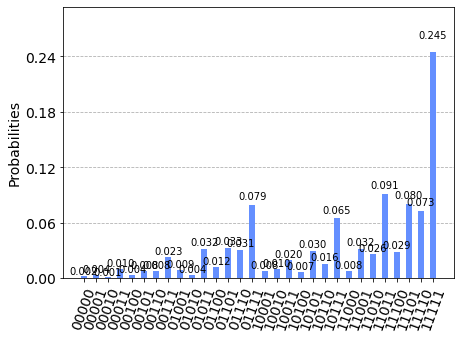

In [147]:
counts = run_for_result(qc)
plot_histogram(counts)

Ok not much difference. Let's try to increment it more for the `num_repeats` and we will discuss after `num_repeats` reaches 6.

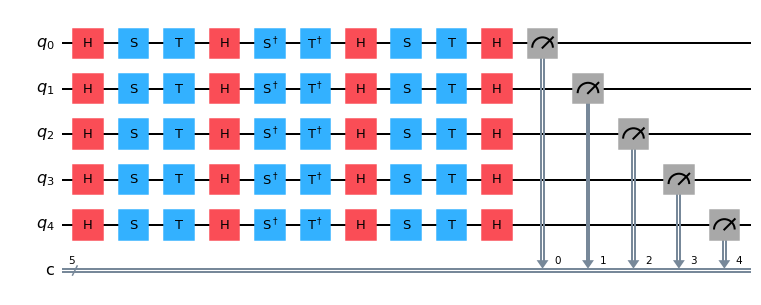

In [148]:
qc = create_circuit(3)
qc.draw("mpl", style="iqx")

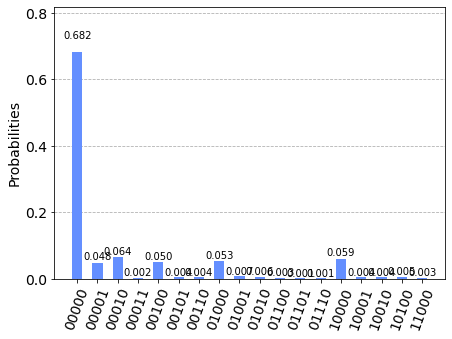

In [149]:
counts = run_for_result(qc)
plot_histogram(counts)

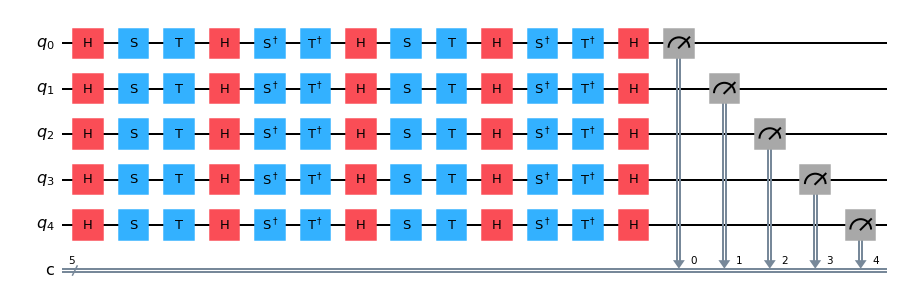

In [150]:
qc = create_circuit(4)
qc.draw("mpl", style="iqx")

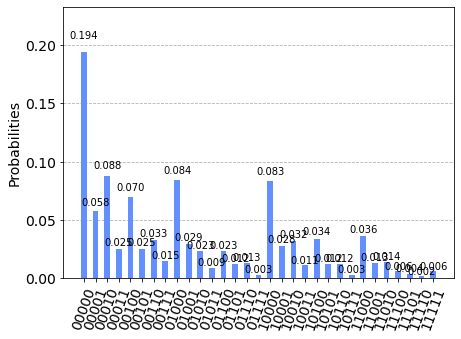

In [151]:
counts = run_for_result(qc)
plot_histogram(counts)

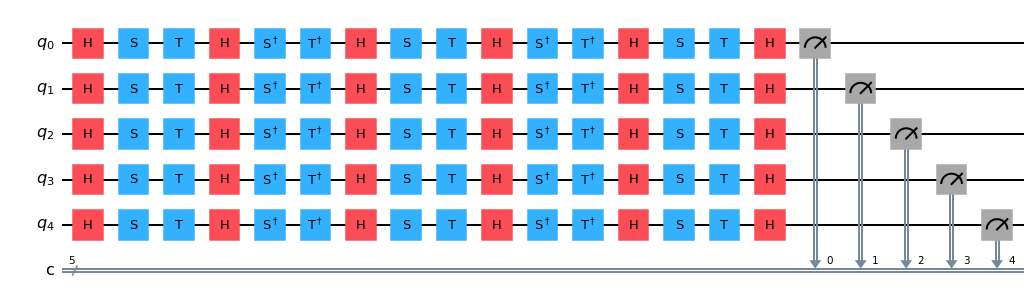

In [152]:
qc = create_circuit(5)
qc.draw("mpl", style="iqx")

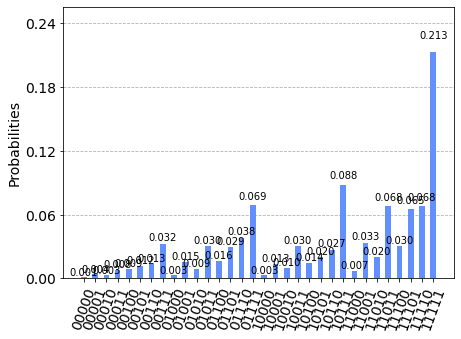

In [153]:
counts = run_for_result(qc)
plot_histogram(counts)

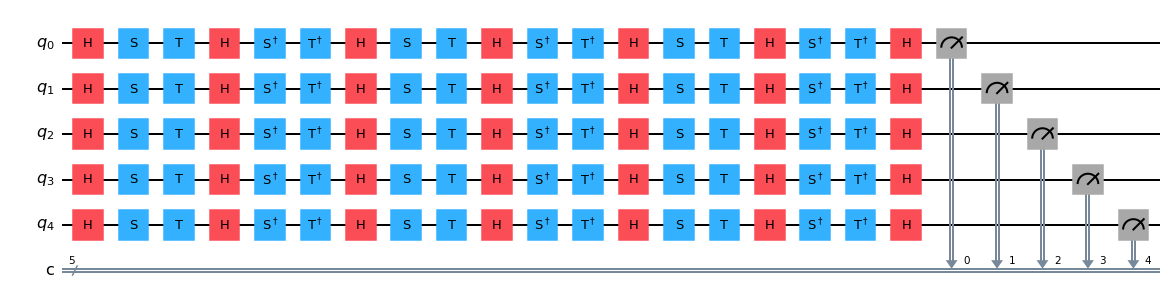

In [154]:
qc = create_circuit(6)
qc.draw("mpl", style="iqx")

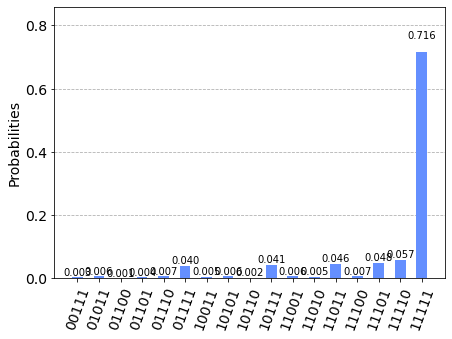

In [155]:
counts = run_for_result(qc)
plot_histogram(counts)

So we see that 1 and 2 although constructive but they share some other constructive with others, 3 and 6 is the same but the destructive bit strings are more destructive than others, 4 and 5 are getting more and more destructive (so they are getting to go into more "balanced" where each bit string gets "approximately equal probability") (equivalent to apply hadamards to all gates and measure immediately after). However does this means that we will have expecting 7, 8 be destructive, 9 be constructive, and 10, 11 be destructive? Let's look at `10`: 

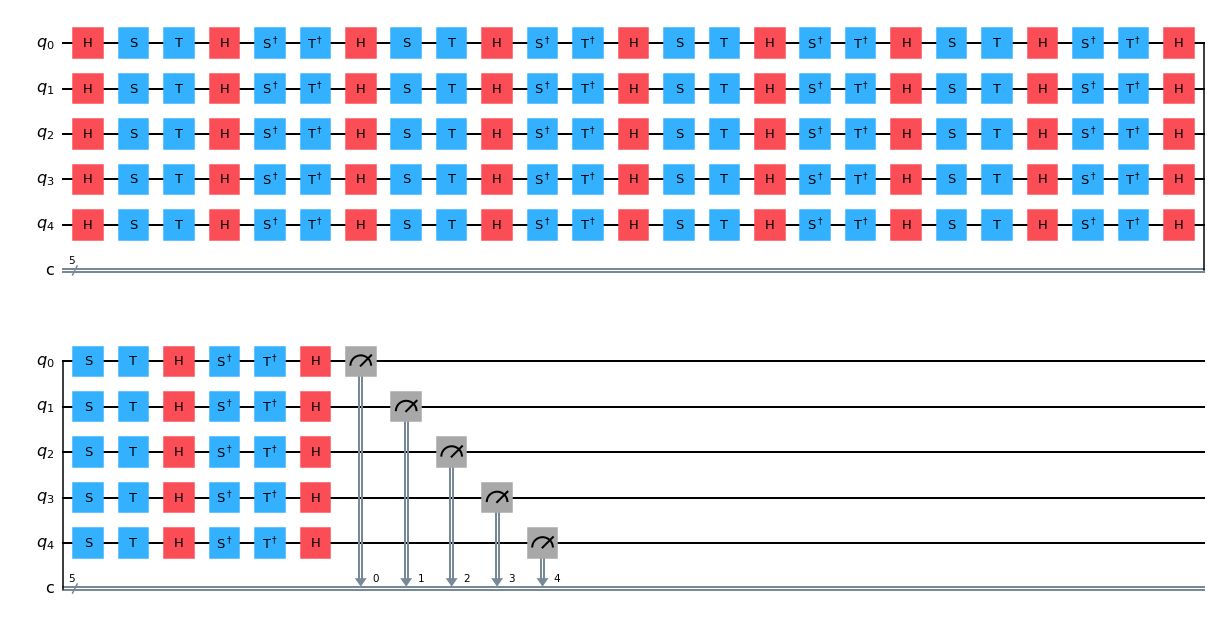

In [156]:
qc = create_circuit(10)
qc.draw("mpl", style="iqx")

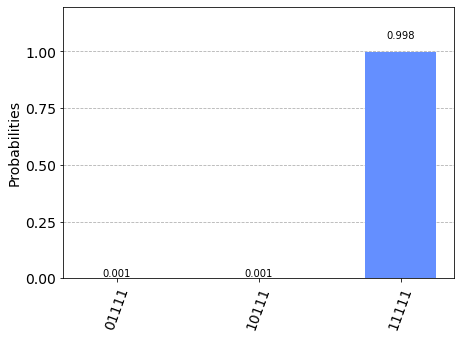

In [157]:
counts = run_for_result(qc)
plot_histogram(counts)

Oh no! The prediction is broken! Well, perhaps there might be importance in this notice, but since we are dealing with artistic here, we don't care about the *why* here. However do notice that the probability of the highest constructive is so high, so it means that, it is not necessarily true that when we increase the gate, the "constructivity" of the interference will get lower and lower (meaning get more and more balanced with more and more noise). No, sometimes you still get to go constructively strong. 

Does this means that every 10 repeats it is constructive to such? Let's check `20`. 

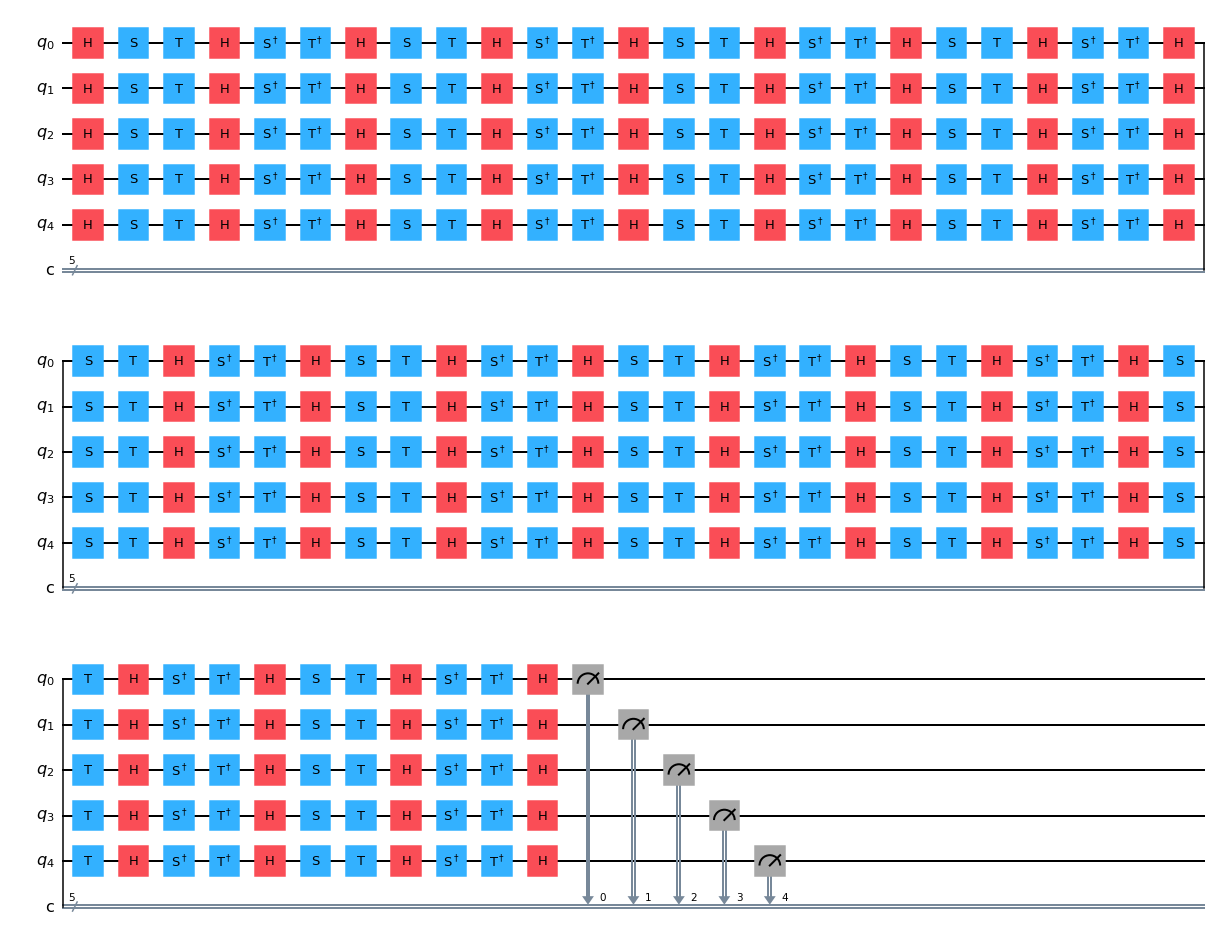

In [158]:
qc = create_circuit(20)
qc.draw("mpl", style="iqx")

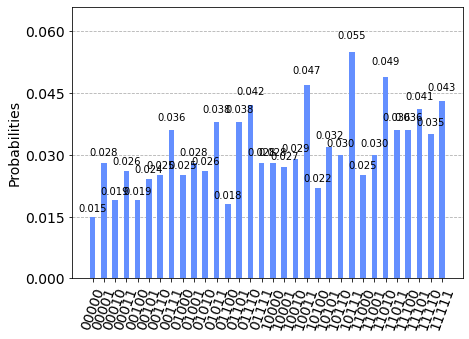

In [159]:
counts = run_for_result(qc)
plot_histogram(counts)

Nah, that's not true. We see a quite destructive interference here and the noise makes it difficult to determine which is which anymore. 

And of course, just like Joy-Vazirani or Bernstein-Vazirani, we could do a "secret string" at the beginning and **if and only if** it is constructive, we would either get a *a direct copy of the string*, or a *direct reverse of the string* . That is, a *direct copy* means the string is exactly our secret string (in qiskit qubit ordering). And a *direct reverse* means that if in our secret string the position originally is $0$, we have $1$ and vice versa, perfectly reversed for each bit (similar to apply an X gate to all qubit after inserting the secret string gates at the beginning). 

Let's do this below. 

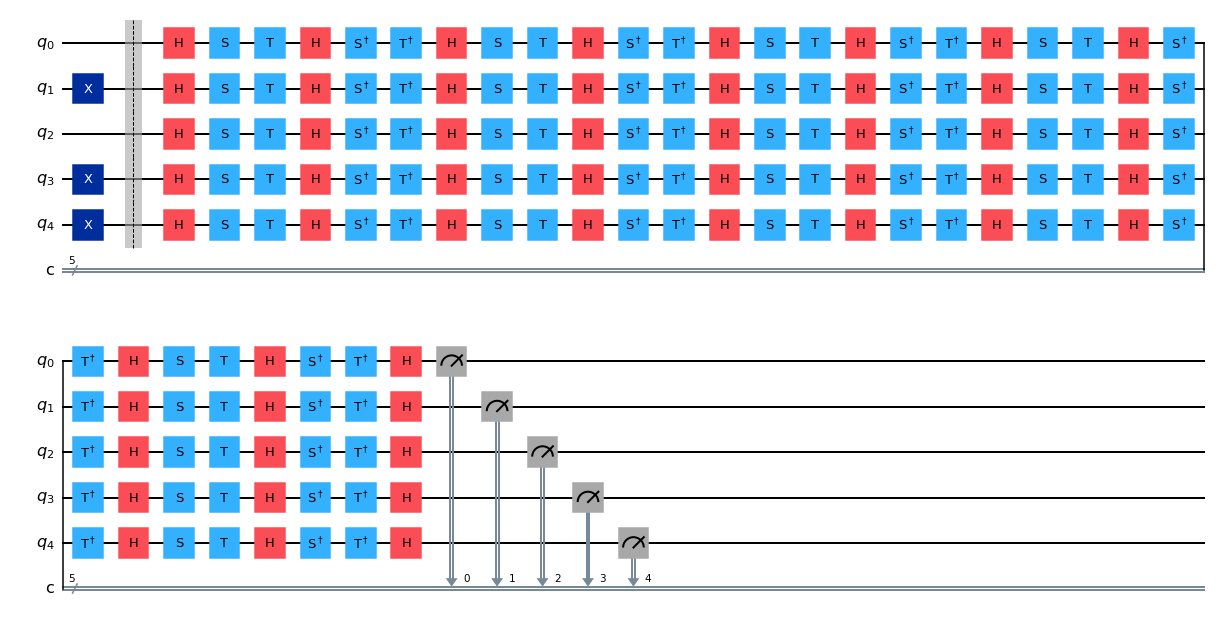

In [160]:
n = 5

qc = QuantumCircuit(n, n)

# secret code
b = "11010"

b = b[::-1]
for i in range(len(b)):
    if b[i] == "1":
        qc.x(i)

qc.barrier()

for _ in range(10):
    qc.h(range(n))

    if _ % 2 == 0:
        qc.s(range(n))
        qc.t(range(n))
    else:
        qc.sdg(range(n))
        qc.tdg(range(n))
    
qc.h(range(n))
qc.measure(range(n), range(n))

qc.draw("mpl", style="iqx")

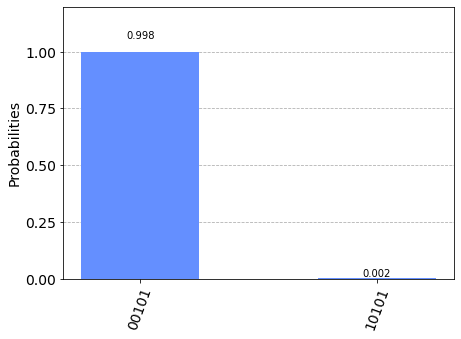

In [162]:
counts = run_for_result(qc)
plot_histogram(counts)

Then we run it once with the IBMQ quito (note the cell below is created later than the run because the experiment is ran earlier in the process when playing around). Please find the result under result folder of the github, in json format. 

In [163]:
qc = create_circuit(10)

In [83]:
provider = IBMQ.load_account()

from qiskit.tools import job_monitor

quito_backend = provider.get_backend("ibmq_quito")
transpiled_qc = transpile(qc, backend=quito_backend)
qobj = assemble(transpiled_qc, shots=8000)
job = quito_backend.run(qobj)
job_monitor(job, interval=2)

<ipython-input-83-0bc304a60daf>:8: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = quito_backend.run(qobj)


Job Status: job has successfully run


{'10001': 1, '10010': 3, '10011': 14, '10100': 1, '10101': 9, '10110': 33, '10111': 284, '11000': 1, '11001': 18, '11010': 46, '11011': 383, '11100': 31, '11101': 267, '11110': 693, '11111': 5896, '00010': 1, '00100': 1, '00101': 1, '00110': 1, '00111': 11, '01000': 1, '01001': 1, '01010': 1, '01011': 11, '01100': 2, '01101': 9, '01110': 39, '01111': 241}


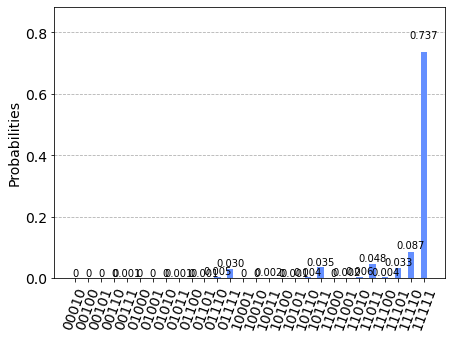

In [84]:
result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

And that's all we have for the artistic play! 

# Hooray! 